# KNN

## 1. Separate data to training set and testing set

In [25]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler

In [56]:
dataset = pd.read_csv('/Users/wenqi/PycharmProjects/DS5360_case1_team3/data/mice.csv')

In [2]:
# dataset = pd.read_csv('/Users/wenqi/PycharmProjects/DS5360_case1_team3/data/after_feature_engineering_dataset.csv')

In [42]:
dataset

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,adenovirus,parainfluenza_4,inf_a_h1n1_2009,metapneumovirus,urea,creatinine,potassium,influenza_a_rapid_test,patient_had_blood_test,patient_had_urine_test
0,44477f75e8169d2,13,0,0,0,0,0.579844,0.478908,0.286543,-0.550290,...,0,0,0,0,-0.439476,0.608106,-0.552949,0,0,0
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0,0,0,0,1.198059,2.089928,-0.305787,0,1,1
2,a46b4402a0e5696,8,0,0,0,0,-1.983676,-1.526084,-1.560043,0.683835,...,0,0,0,0,0.900325,-0.322340,-0.058626,0,0,0
3,f7d619a94f97c45,5,0,0,0,0,-1.388574,-1.212804,0.311666,1.132609,...,0,0,0,0,-1.183810,-1.597396,-0.058626,0,0,0
4,d9e41465789c2b5,15,0,0,0,0,-0.358588,-0.335620,0.261419,0.683835,...,0,0,0,0,0.007125,-0.253418,0.682859,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,1,0,0,0,-0.679027,-0.962180,-0.178244,-0.438097,...,0,0,0,0,0.007125,-1.666318,-0.552949,0,0,0
5640,517c2834024f3ea,17,0,0,0,0,-0.701917,-0.648900,0.650835,-1.223449,...,0,0,0,0,0.155991,-1.149404,0.682859,0,0,0
5641,5c57d6037fe266d,4,0,0,0,0,-0.633250,-0.774212,0.173487,-0.999063,...,0,0,0,0,-1.034943,-0.287879,-1.047272,0,0,0
5642,c20c44766f28291,10,0,0,0,0,0.740064,0.353596,-1.333931,-0.213711,...,0,0,1,0,0.528158,0.194574,-1.294433,0,0,0


In [43]:
# dataset = dataset.fillna(0)

In [44]:
dataset.columns.size

30

In [45]:
dataset.groupby('sars_cov_2_exam_result')['sars_cov_2_exam_result'].count()

sars_cov_2_exam_result
0    5086
1     558
Name: sars_cov_2_exam_result, dtype: int64

In [46]:
# looking for null values
total_null_values = dataset.isnull().sum().sort_values(ascending=False) 
not_null_values = dataset.notnull().sum().sort_values(ascending=False) 
null_values_percentage = (dataset.isnull().sum()/dataset.notnull().count().sort_values(ascending=False)) * 100

# concating the calculated values with the data frame of null values
dataset_missing_values = pd.concat({'Null': total_null_values, 'Not Null': not_null_values, 'Percentage': null_values_percentage}, axis=1)

# view the newly formed dataframe
dataset_missing_values=dataset_missing_values[dataset_missing_values['Percentage']>70]

# how many colums has missing values>70
dataset_missing_values.shape[0]

0

In [47]:
dataset_negative=dataset[dataset['sars_cov_2_exam_result']==0]
dataset_positive=dataset[dataset['sars_cov_2_exam_result']==1]

In [48]:
dataset_negative

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,adenovirus,parainfluenza_4,inf_a_h1n1_2009,metapneumovirus,urea,creatinine,potassium,influenza_a_rapid_test,patient_had_blood_test,patient_had_urine_test
0,44477f75e8169d2,13,0,0,0,0,0.579844,0.478908,0.286543,-0.550290,...,0,0,0,0,-0.439476,0.608106,-0.552949,0,0,0
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0,0,0,0,1.198059,2.089928,-0.305787,0,1,1
2,a46b4402a0e5696,8,0,0,0,0,-1.983676,-1.526084,-1.560043,0.683835,...,0,0,0,0,0.900325,-0.322340,-0.058626,0,0,0
3,f7d619a94f97c45,5,0,0,0,0,-1.388574,-1.212804,0.311666,1.132609,...,0,0,0,0,-1.183810,-1.597396,-0.058626,0,0,0
4,d9e41465789c2b5,15,0,0,0,0,-0.358588,-0.335620,0.261419,0.683835,...,0,0,0,0,0.007125,-0.253418,0.682859,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,2ea15fb0c220027,12,0,0,0,0,1.564053,1.732028,-0.454604,0.010677,...,0,0,0,0,1.942393,1.607475,-0.305787,0,0,0
5638,21af7c93c7fc540,14,0,0,0,0,-0.038148,-0.147652,-0.416919,1.469188,...,0,0,0,0,-0.216176,-0.770333,-0.800110,0,0,0
5640,517c2834024f3ea,17,0,0,0,0,-0.701917,-0.648900,0.650835,-1.223449,...,0,0,0,0,0.155991,-1.149404,0.682859,0,0,0
5641,5c57d6037fe266d,4,0,0,0,0,-0.633250,-0.774212,0.173487,-0.999063,...,0,0,0,0,-1.034943,-0.287879,-1.047272,0,0,0


In [49]:
# for column in list(dataset_positive.columns[dataset_positive.isnull().sum() > 0]):
#     mean_val = dataset_positive[column].mean()
#     dataset_positive[column].fillna(mean_val, inplace=True)

In [50]:
# for column in list(dataset_negative.columns[dataset_negative.isnull().sum() > 0]):
#     mean_val = dataset_negative[column].mean()
#     dataset_negative[column].fillna(mean_val, inplace=True)

In [51]:
dataset_negative

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,adenovirus,parainfluenza_4,inf_a_h1n1_2009,metapneumovirus,urea,creatinine,potassium,influenza_a_rapid_test,patient_had_blood_test,patient_had_urine_test
0,44477f75e8169d2,13,0,0,0,0,0.579844,0.478908,0.286543,-0.550290,...,0,0,0,0,-0.439476,0.608106,-0.552949,0,0,0
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0,0,0,0,1.198059,2.089928,-0.305787,0,1,1
2,a46b4402a0e5696,8,0,0,0,0,-1.983676,-1.526084,-1.560043,0.683835,...,0,0,0,0,0.900325,-0.322340,-0.058626,0,0,0
3,f7d619a94f97c45,5,0,0,0,0,-1.388574,-1.212804,0.311666,1.132609,...,0,0,0,0,-1.183810,-1.597396,-0.058626,0,0,0
4,d9e41465789c2b5,15,0,0,0,0,-0.358588,-0.335620,0.261419,0.683835,...,0,0,0,0,0.007125,-0.253418,0.682859,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,2ea15fb0c220027,12,0,0,0,0,1.564053,1.732028,-0.454604,0.010677,...,0,0,0,0,1.942393,1.607475,-0.305787,0,0,0
5638,21af7c93c7fc540,14,0,0,0,0,-0.038148,-0.147652,-0.416919,1.469188,...,0,0,0,0,-0.216176,-0.770333,-0.800110,0,0,0
5640,517c2834024f3ea,17,0,0,0,0,-0.701917,-0.648900,0.650835,-1.223449,...,0,0,0,0,0.155991,-1.149404,0.682859,0,0,0
5641,5c57d6037fe266d,4,0,0,0,0,-0.633250,-0.774212,0.173487,-0.999063,...,0,0,0,0,-1.034943,-0.287879,-1.047272,0,0,0


In [52]:
dataset_positive

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,adenovirus,parainfluenza_4,inf_a_h1n1_2009,metapneumovirus,urea,creatinine,potassium,influenza_a_rapid_test,patient_had_blood_test,patient_had_urine_test
67,78511c183ae18bc,7,1,0,0,0,-0.724805,-0.523588,-0.504851,-0.213711,...,0,0,0,0,-0.067309,-0.046652,0.435697,0,0,0
284,d7834ed75f2da44,16,1,1,0,0,-1.709013,-1.526084,-0.994762,0.796029,...,0,0,0,0,-0.216176,0.263496,-1.788756,0,0,0
513,b16b49f7bd3e692,10,1,0,0,0,-0.518807,-0.460932,0.625712,0.010677,...,0,0,0,0,0.007125,0.332418,-0.552949,0,0,0
568,4382f5ea05e60c4,2,1,0,0,0,0.991838,0.792188,-0.341548,1.469188,...,0,0,0,0,-0.513909,-0.322340,-0.058626,0,1,1
676,d3729cd2658ca64,15,1,0,0,0,-0.267033,-0.460932,-0.027502,0.235063,...,0,0,0,0,0.453725,0.022270,0.188535,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,5c386388ba3c3f0,16,1,0,0,0,-0.312811,-0.460932,-1.585167,1.132609,...,0,0,0,0,0.528158,-0.184496,-0.552949,0,0,0
5633,9f8dfe2ae239238,4,1,0,0,0,0.556955,0.478908,-0.391795,1.020415,...,0,0,0,0,-0.290609,-0.115574,-0.552949,0,0,0
5634,db77903261ab6d0,15,1,0,0,0,-1.297019,-1.150148,-1.333931,0.908221,...,0,0,0,0,-0.216176,-0.218957,0.188535,0,0,0
5639,ae66feb9e4dc3a0,3,1,0,0,0,-0.679027,-0.962180,-0.178244,-0.438097,...,0,0,0,0,0.007125,-1.666318,-0.552949,0,0,0


In [53]:
dataset=pd.concat([dataset_negative,dataset_positive])

In [57]:
knn = KNeighborsClassifier()

In [66]:
# defining target 
target = dataset['sars_cov_2_exam_result']

# defining predictor variables 
features = dataset.drop(['sars_cov_2_exam_result','patient_id'], axis=1)

# assigning the splitting of data into respective variables
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify = target)

In [67]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)

In [68]:
y_resampled.to_frame().groupby('sars_cov_2_exam_result')['sars_cov_2_exam_result'].count()

sars_cov_2_exam_result
0    3559
1    3559
Name: sars_cov_2_exam_result, dtype: int64

In [61]:
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1,
                                            weights='distance')
classifier.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [62]:
y_pred = classifier.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred,labels=[0,1])

In [64]:
cm

array([[1402,  125],
       [ 113,   54]])

Text(30.5, 0.5, 'true')

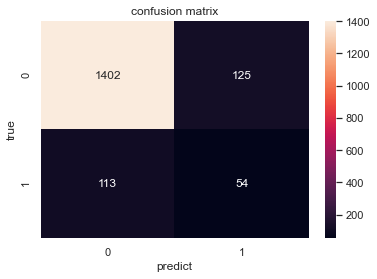

In [65]:
sns.set()
f,ax=plt.subplots()
sns.heatmap(cm,annot=True,ax=ax, fmt='g') #plot haetmap for confusion metrix

ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 